# Loan Risk Prediction
A loan is a financial agreement in which a bank or financial institution provides a borrower with a specific amount of money, which must be repaid over time with interest
## Project Overview
The Loan Risk Prediction System is a machine learning-based model designed to assess the risk associated with loan applications. The system evaluates various financial and other parameters to classify loan applications into risk categories (Low, Medium, High). This helps banks and financial institutions in making effecient lending decisions, and setting appropriate interest rates.
## Description
The dataset is taken from Kaggle and contains information about Credit score,credit type,loan status,loan limit,LTV,dtir1.
The dataset contains- 148670 rows × 34 columns.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv(r"C:\Users\DEEPESH VERMA\Desktop\Puthon_pregrad\major project\Loan_Default.csv")
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

## Dropping Unnecessary Column's

In [19]:
drop = [
     "year", "loan_limit", "approv_in_adv","Neg_ammortization", 
    "submission_of_application","Upfront_charges", 
    "construction_type",
    "total_units", "Region","Interest_rate_spread","loan_purpose","term","age","Gender","interest_only","Security_Type"]

df.drop(columns=drop, inplace=True,errors="ignore")


In [20]:
print(df.columns)


Index(['ID', 'loan_type', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'lump_sum_payment', 'property_value', 'occupancy_type', 'Secured_by',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'LTV', 'Status', 'dtir1'],
      dtype='object')


In [21]:
df

,ID,loan_type,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,lump_sum_payment,property_value,occupancy_type,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,LTV,Status,dtir1
0,24890,type1,l1,nopc,nob/c,116500,NaN,not_lpsm,118000.0,pr,home,1740.0,EXP,758,CIB,98.728814,1,45.0
1,24891,type2,l1,nopc,b/c,206500,NaN,lpsm,NaN,pr,home,4980.0,EQUI,552,EXP,NaN,1,NaN
2,24892,type1,l1,nopc,nob/c,406500,4.560,not_lpsm,508000.0,pr,home,9480.0,EXP,834,CIB,80.019685,0,46.0
3,24893,type1,l1,nopc,nob/c,456500,4.250,not_lpsm,658000.0,pr,home,11880.0,EXP,587,CIB,69.376900,0,42.0
4,24894,type1,l1,nopc,nob/c,696500,4.000,not_lpsm,758000.0,pr,home,10440.0,CRIF,602,EXP,91.886544,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,type1,l1,nopc,nob/c,436500,3.125,not_lpsm,608000.0,pr,home,7860.0,CIB,659,EXP,71.792763,0,48.0
148666,173556,type1,l1,nopc,nob/c,586500,5.190,not_lpsm,788000.0,ir,home,7140.0,CIB,569,CIB,74.428934,0,15.0
148667,173557,type1,l1,nopc,nob/c,446500,3.125,not_lpsm,728000.0,pr,home,6900.0,CIB,702,EXP,61.332418,0,49.0
148668,173558,type1,l1,nopc,nob/c,196500,3.500,not_lpsm,278000.0,pr,home,7140.0,EXP,737,EXP,70.683453,0,29.0


### Replacing missing value with mean, median, mode for data consistency

In [22]:
df["rate_of_interest"] = df["rate_of_interest"].fillna(df["rate_of_interest"].mode()[0])
df["property_value"] = df["property_value"].fillna(df["property_value"].median())
df["income"] = df["income"].fillna(df["income"].median())
df["LTV"] = df["LTV"].fillna(df["LTV"].mean())
df["dtir1"] = df["dtir1"].fillna(df["dtir1"].mean())


In [24]:
df.isna().sum()

ID                          0
loan_type                   0
Credit_Worthiness           0
open_credit                 0
business_or_commercial      0
loan_amount                 0
rate_of_interest            0
lump_sum_payment            0
property_value              0
occupancy_type              0
Secured_by                  0
income                      0
credit_type                 0
Credit_Score                0
co-applicant_credit_type    0
LTV                         0
Status                      0
dtir1                       0
dtype: int64

In [25]:
df.loan_amount.value_counts()


loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64

In [26]:
df.rate_of_interest.value_counts()

rate_of_interest
3.990    50894
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: count, Length: 131, dtype: int64

In [27]:
df.income.value_counts()

income
5760.0      10092
0.0          1260
3600.0       1250
4200.0       1243
4800.0       1191
            ...  
45300.0         1
154440.0        1
137760.0        1
145560.0        1
79920.0         1
Name: count, Length: 1001, dtype: int64

In [28]:
df.Credit_Score.value_counts()

Credit_Score
763    415
867    413
639    411
581    408
554    407
      ... 
745    330
573    330
743    327
748    324
559    321
Name: count, Length: 401, dtype: int64

## Important
Since the original dataset does not contain risk column so it has to be added, risk is classified in three categories (High,Medium,Low) based on several industry standard factors,using percentile function to get the best threshold values for this particular dataset and critical thinking.

In [52]:
# Determine dynamic thresholds using percentiles
ltv_thresholds = df["LTV"].quantile([0.33, 0.66]).values
loan_amount_thresholds = df["loan_amount"].quantile([0.33, 0.66]).values
roi_thresholds = df["rate_of_interest"].quantile([0.33, 0.66]).values
dtir_thresholds = df["dtir1"].quantile([0.33, 0.66]).values


def calculate_risk(row):
    score = 0

    # Loan-to-Value Ratio (LTV)
    if row["LTV"] < ltv_thresholds[0]:
        score += 1
    elif row["LTV"] < ltv_thresholds[1]:
        score += 2
    else:
        score += 3

    # Loan Amount
    if row["loan_amount"] < loan_amount_thresholds[0]:
        score += 1
    elif row["loan_amount"] < loan_amount_thresholds[1]:
        score += 2
    else:
        score += 3

    # Interest Rate
    if row["rate_of_interest"] < roi_thresholds[0]:
        score += 1
    elif row["rate_of_interest"] < roi_thresholds[1]:
        score += 2
    else:
        score += 3

    # Debt-to-Income Ratio (DTI)
    if row["dtir1"] < dtir_thresholds[0]:
        score += 1
    elif row["dtir1"] < dtir_thresholds[1]:
        score += 2
    else:
        score += 3

    # Property Value (Higher value = Lower risk)
    if row["property_value"] > df["property_value"].median():
        score += 1
    else:
        score += 2
    # Credit Type
    if row["credit_type"] == "CIB":
         score += 1
    elif row["credit_type"] == "EXP":
         score += 2
    elif row["credit_type"] == "EQUI":
         score += 2   
    else:
         score += 3  

    # Co-applicant Credit Type
    if row["co-applicant_credit_type"] == "CIB":
          score += 1
    else:
          score += 2   

    # credit worthiness     
    if row["Credit_Worthiness"] in ["l1"]:
        score += 2
    else:
        score += 4    

     # Loan Status (Fixed)
    if row["Status"] == 1:  # Approved
        score += 1
    else:  # Not Approved
        score += 3

    # Occupancy (Owner-occupied = lower risk)
    if  row["occupancy_type"] == "pr":
        score += 1
    elif row["occupancy_type"] == "sr":
        score += 2
    else:
        score +=3 

    # Assign final risk category
    if score <= 17:
        return "Low"
    elif score <= 22:
        return "Medium"
    else:
        return "High"
df["Risk"] = df.apply(calculate_risk, axis=1)       
        

In [53]:
df["Risk"]


0         Medium
1         Medium
2         Medium
3         Medium
4           High
           ...  
148665    Medium
148666    Medium
148667    Medium
148668       Low
148669    Medium
Name: Risk, Length: 148670, dtype: object

In [54]:
df["Risk"].value_counts()

Risk
Medium    111224
Low        29005
High        8441
Name: count, dtype: int64

In [56]:
df

,ID,loan_type,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,lump_sum_payment,property_value,occupancy_type,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,LTV,Status,dtir1,Risk
0,24890,type1,l1,nopc,nob/c,116500,3.990,not_lpsm,118000.0,pr,home,1740.0,EXP,758,CIB,98.728814,1,45.000000,Medium
1,24891,type2,l1,nopc,b/c,206500,3.990,lpsm,418000.0,pr,home,4980.0,EQUI,552,EXP,72.746457,1,37.732932,Medium
2,24892,type1,l1,nopc,nob/c,406500,4.560,not_lpsm,508000.0,pr,home,9480.0,EXP,834,CIB,80.019685,0,46.000000,Medium
3,24893,type1,l1,nopc,nob/c,456500,4.250,not_lpsm,658000.0,pr,home,11880.0,EXP,587,CIB,69.376900,0,42.000000,Medium
4,24894,type1,l1,nopc,nob/c,696500,4.000,not_lpsm,758000.0,pr,home,10440.0,CRIF,602,EXP,91.886544,0,39.000000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,type1,l1,nopc,nob/c,436500,3.125,not_lpsm,608000.0,pr,home,7860.0,CIB,659,EXP,71.792763,0,48.000000,Medium
148666,173556,type1,l1,nopc,nob/c,586500,5.190,not_lpsm,788000.0,ir,home,7140.0,CIB,569,CIB,74.428934,0,15.000000,Medium
148667,173557,type1,l1,nopc,nob/c,446500,3.125,not_lpsm,728000.0,pr,home,6900.0,CIB,702,EXP,61.332418,0,49.000000,Medium
148668,173558,type1,l1,nopc,nob/c,196500,3.500,not_lpsm,278000.0,pr,home,7140.0,EXP,737,EXP,70.683453,0,29.000000,Low


# Data Visualization
Visualizing data in eight major types of visualization.

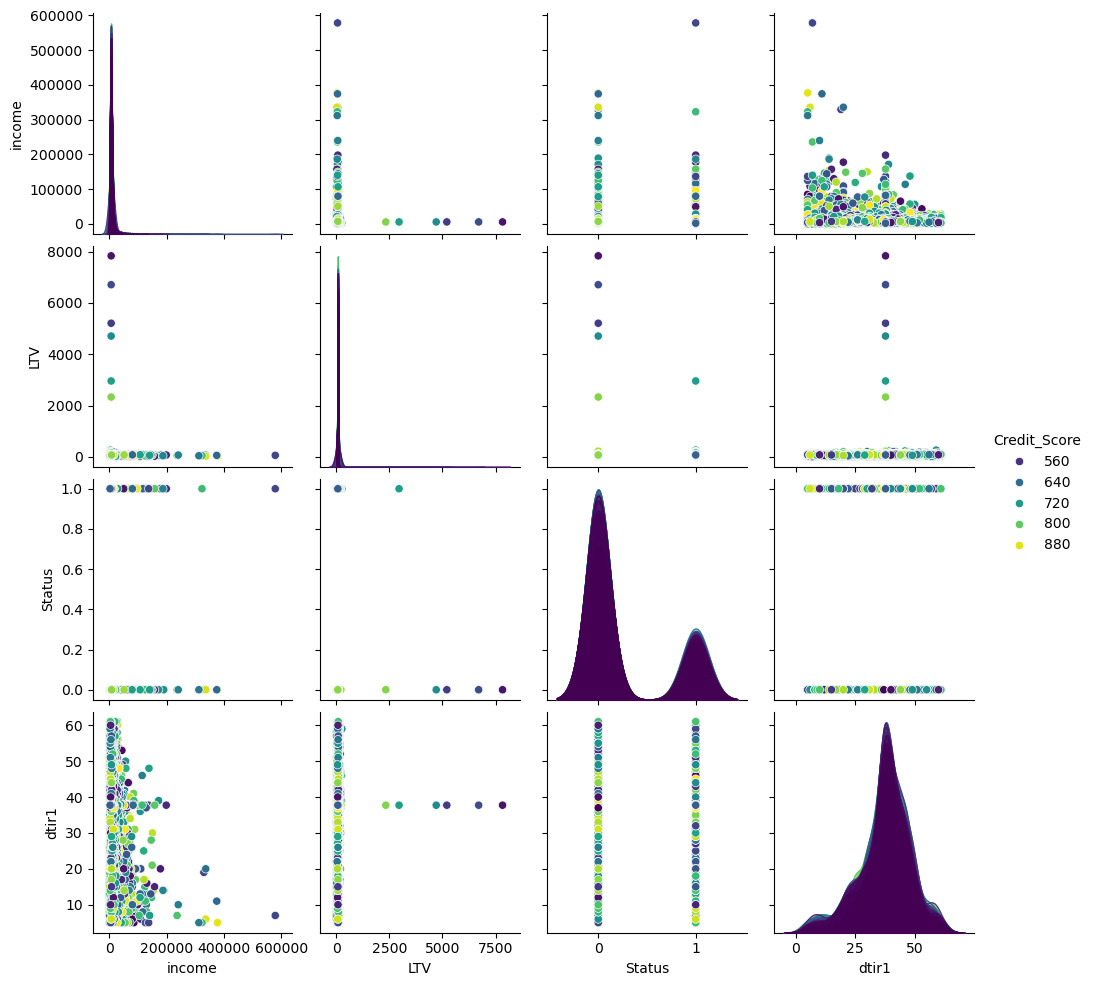

In [57]:
columns = ["income", "LTV", "Status", "dtir1"]
sns.pairplot(df, vars=columns, hue="Credit_Score", palette="viridis")
plt.show()

- Higher credit scores are more concentrated in the approved  region.
- Lower credit scores  are more common in rejected cases.
- Higher dtir1 (Debt-to-Income Ratio) might contribute to rejections, as seen in spread distributions.
- LTV vs. Income: Most data points are grouped around lower values, showing that high-income applicants do not always have high LTV

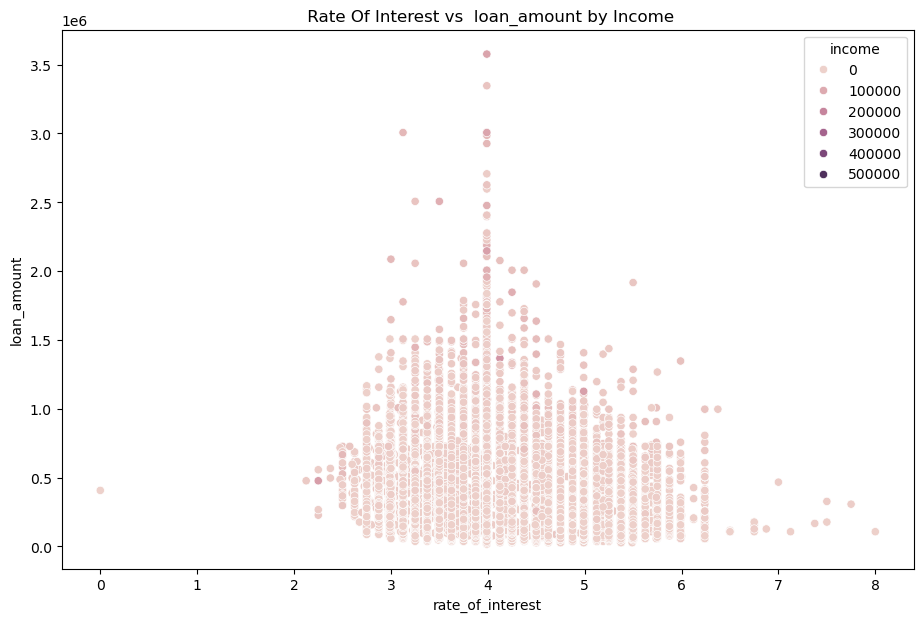

In [58]:
plt.figure(figsize=(11, 7))
sns.scatterplot(x='rate_of_interest', y='loan_amount', hue='income', data=df)
plt.title(" Rate Of Interest vs  loan_amount by Income")
plt.show()

- Most loan amounts are concentrated in the lower range
- Interest rates mostly range between 2% to 6%.
- Higher loan amounts are observed across different interest rates, meaning that loans are not strictly limited to a specific interest range.count
- Loan amounts decrease as interest rates increase beyond 6%, suggesting that borrowers prefer lower rates.
- Higher-income individuals (darker points) are present across all loan amounts, but they are not necessarily taking the highest loans.

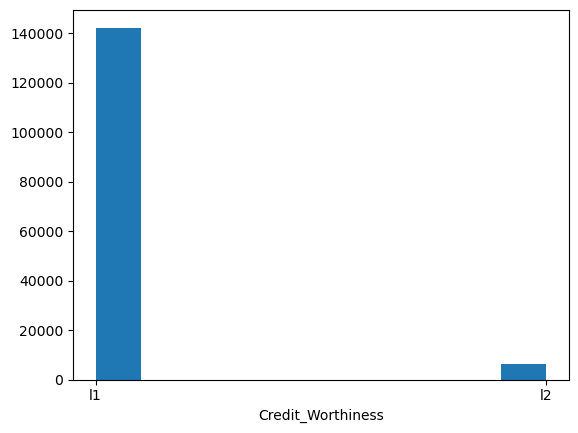

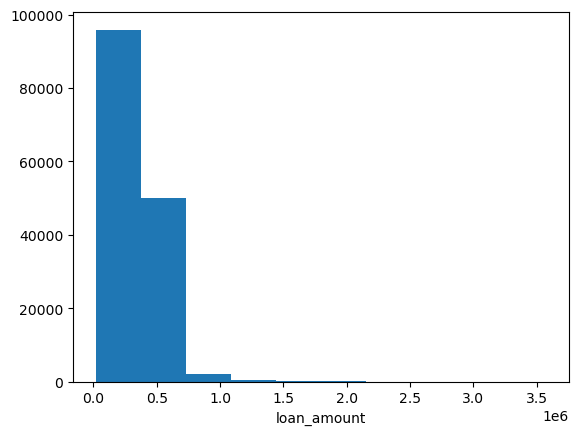

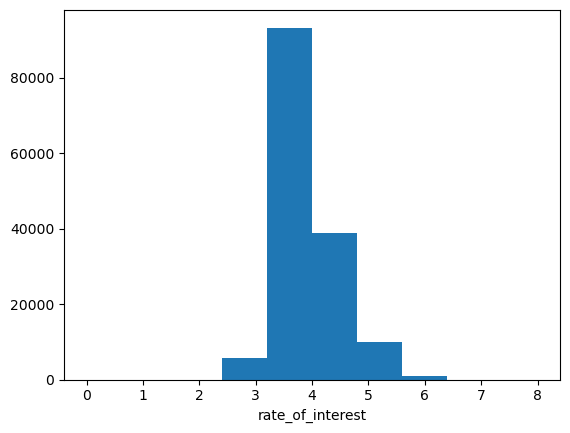

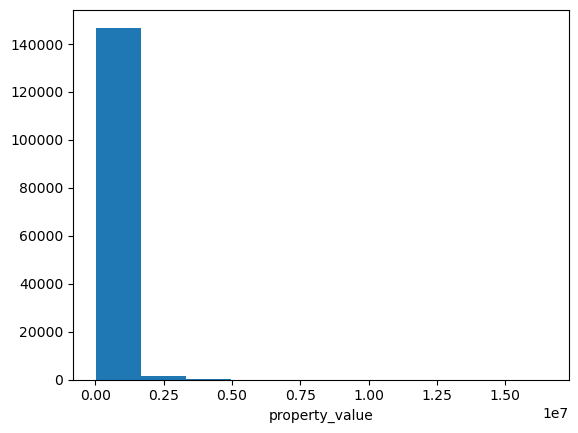

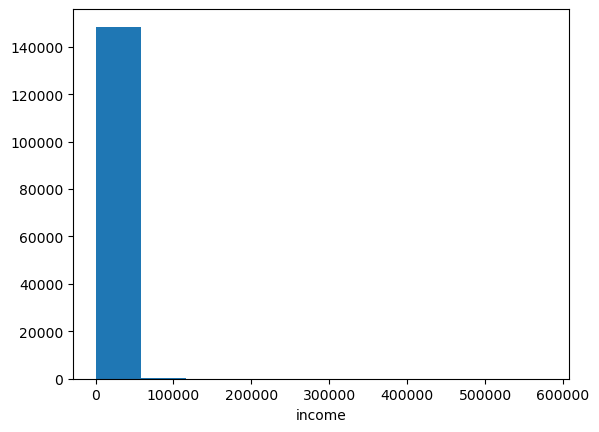

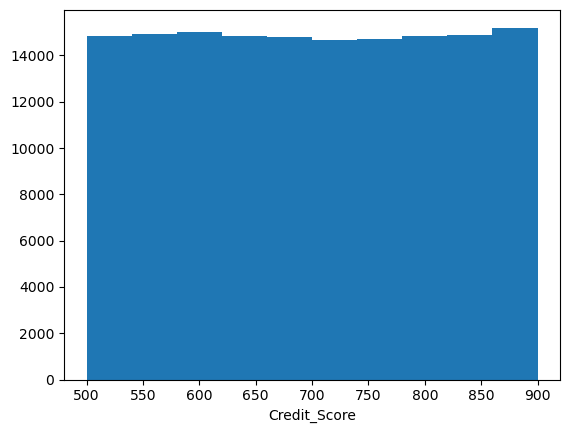

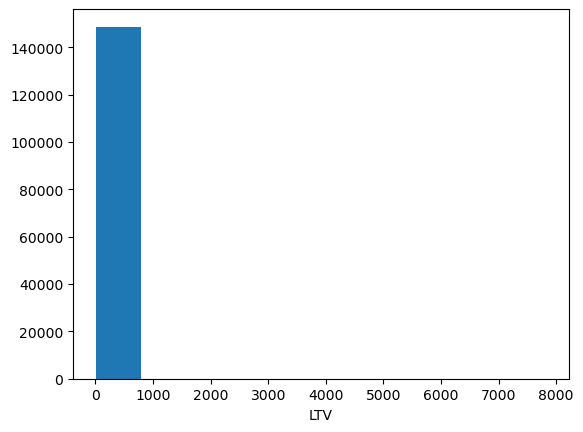

In [59]:
columns=['Credit_Worthiness','loan_amount','rate_of_interest','property_value','income','Credit_Score','LTV']
for column in columns:
    plt.xlabel(column)
    plt.hist(df[column])
    plt.show()

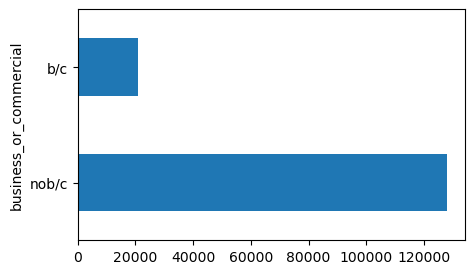

In [60]:
plt.figure(figsize=(5, 3))
df.business_or_commercial.value_counts().plot(kind='barh')
plt.show()

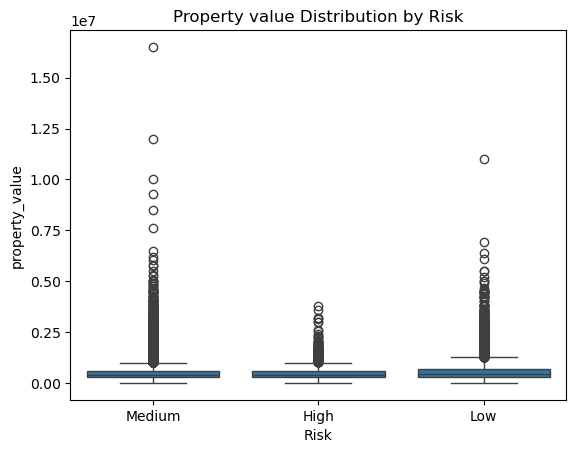

In [61]:
sns.boxplot(x="Risk", y="property_value", data=df)
plt.title("Property value Distribution by Risk")
plt.show()


Most of the application lies in the medium risk category,then in low risk and the loswest number in high risk which means th bank will accept nearly all the low risk application and will reject all the high risk and for the medium risk bank will proceed with caution and  reject some of the appliction or may charge higer rate of intrest on the loan.

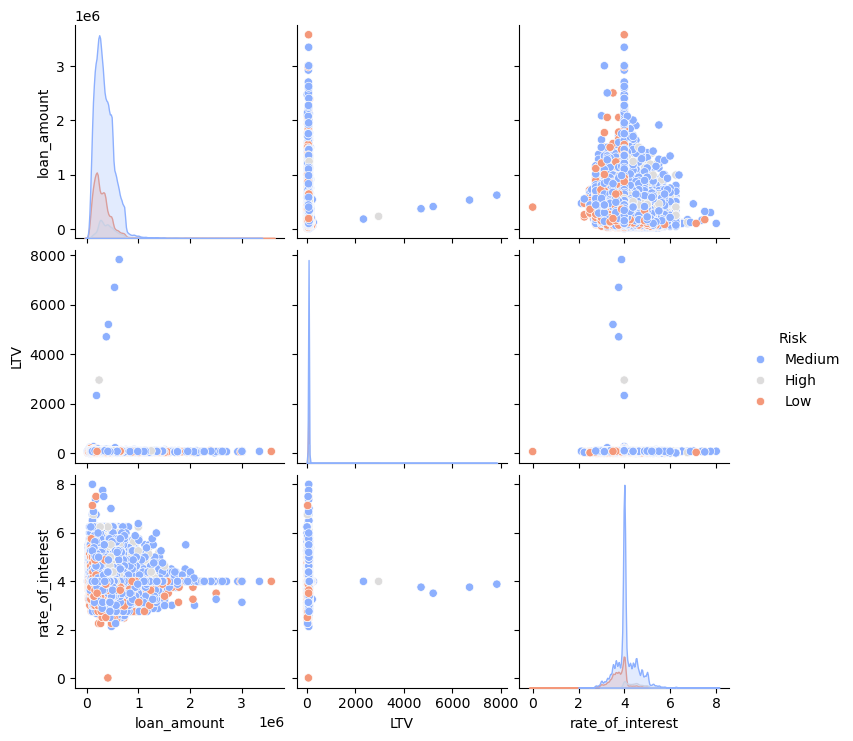

In [62]:
sns.pairplot(df, vars=["loan_amount", "LTV", "rate_of_interest"], hue="Risk", palette="coolwarm")
plt.show()


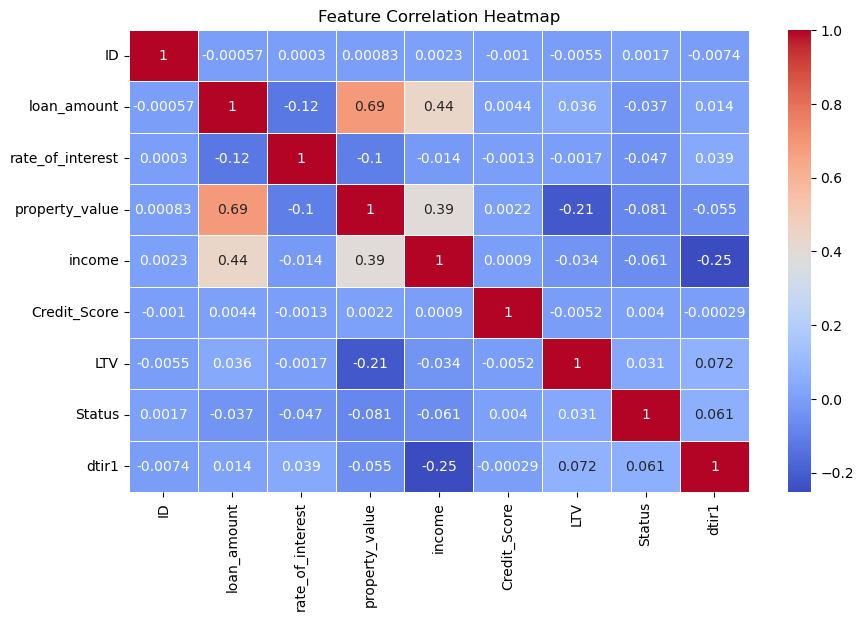

In [63]:

plt.figure(figsize=(10, 6))


numerical = df.select_dtypes(include=[np.number])


sns.heatmap(numerical.corr(), annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()



- Loan Amount & Property Value (0.69) → Higher property values are associated with larger loan amounts.
- Income & Loan Amount (0.44) → Higher income individuals tend to take larger loans.
- Property Value & Income (0.39) → Higher-income individuals own higher-value properties.
- Rate of Interest & Loan Amount (-0.12) → Interest rate has minimal correlation with the loan amount.
- Debt-to-Income Ratio (dtir1) & Income (-0.25) → Higher-income individuals tend to have lower debt-to-income ratios.
- LTV & Property Value (-0.21) → Loan-to-value ratio decreases as property value increases.

C:\Users\DEEPESH VERMA\AppData\Local\Temp\ipykernel_21696\1338441307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'], bins=50)


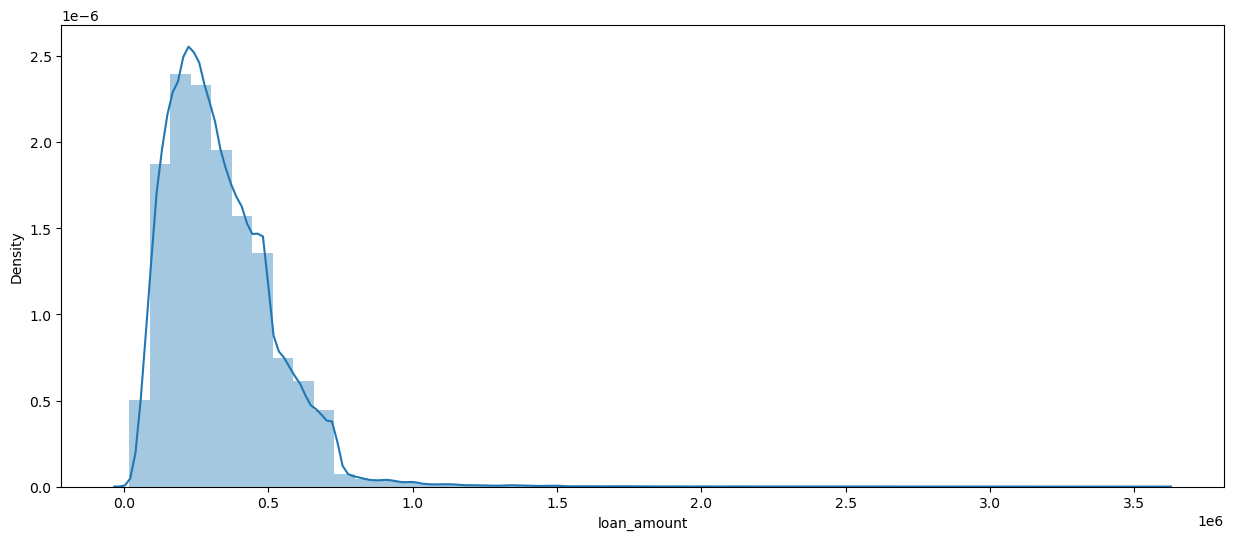

In [64]:
plt.figure(figsize=(15, 6))
sns.distplot(df['loan_amount'], bins=50)
plt.show()

- Most loan amounts are on the lower end
- A few high loan amounts exist, but they are much less frequent.

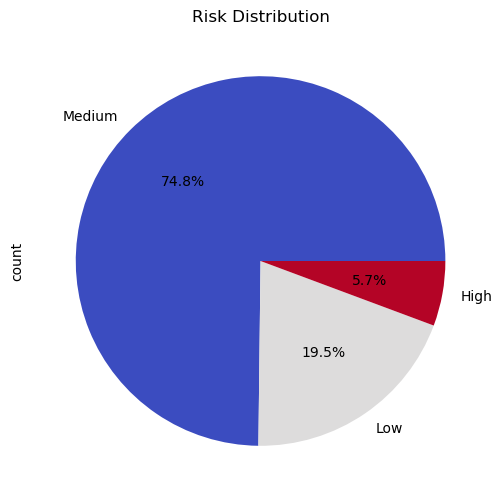

In [65]:
df["Risk"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", figsize=(6, 6))
plt.title("Risk Distribution")
plt.show()


In [66]:
df

,ID,loan_type,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,lump_sum_payment,property_value,occupancy_type,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,LTV,Status,dtir1,Risk
0,24890,type1,l1,nopc,nob/c,116500,3.990,not_lpsm,118000.0,pr,home,1740.0,EXP,758,CIB,98.728814,1,45.000000,Medium
1,24891,type2,l1,nopc,b/c,206500,3.990,lpsm,418000.0,pr,home,4980.0,EQUI,552,EXP,72.746457,1,37.732932,Medium
2,24892,type1,l1,nopc,nob/c,406500,4.560,not_lpsm,508000.0,pr,home,9480.0,EXP,834,CIB,80.019685,0,46.000000,Medium
3,24893,type1,l1,nopc,nob/c,456500,4.250,not_lpsm,658000.0,pr,home,11880.0,EXP,587,CIB,69.376900,0,42.000000,Medium
4,24894,type1,l1,nopc,nob/c,696500,4.000,not_lpsm,758000.0,pr,home,10440.0,CRIF,602,EXP,91.886544,0,39.000000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,type1,l1,nopc,nob/c,436500,3.125,not_lpsm,608000.0,pr,home,7860.0,CIB,659,EXP,71.792763,0,48.000000,Medium
148666,173556,type1,l1,nopc,nob/c,586500,5.190,not_lpsm,788000.0,ir,home,7140.0,CIB,569,CIB,74.428934,0,15.000000,Medium
148667,173557,type1,l1,nopc,nob/c,446500,3.125,not_lpsm,728000.0,pr,home,6900.0,CIB,702,EXP,61.332418,0,49.000000,Medium
148668,173558,type1,l1,nopc,nob/c,196500,3.500,not_lpsm,278000.0,pr,home,7140.0,EXP,737,EXP,70.683453,0,29.000000,Low


# Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
lists=['loan_type','Credit_Worthiness', 'open_credit','business_or_commercial','lump_sum_payment','occupancy_type','Secured_by','credit_type','co-applicant_credit_type','Risk']
for k in lists:
    d = LabelEncoder()
    df[k] = d.fit_transform(df[k].astype(str))
    label_encoders[k] = d
df 

,ID,loan_type,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,lump_sum_payment,property_value,occupancy_type,Secured_by,income,credit_type,Credit_Score,co-applicant_credit_type,LTV,Status,dtir1,Risk
0,24890,0,0,0,1,116500,3.990,1,118000.0,1,0,1740.0,3,758,0,98.728814,1,45.000000,2
1,24891,1,0,0,0,206500,3.990,0,418000.0,1,0,4980.0,2,552,1,72.746457,1,37.732932,2
2,24892,0,0,0,1,406500,4.560,1,508000.0,1,0,9480.0,3,834,0,80.019685,0,46.000000,2
3,24893,0,0,0,1,456500,4.250,1,658000.0,1,0,11880.0,3,587,0,69.376900,0,42.000000,2
4,24894,0,0,0,1,696500,4.000,1,758000.0,1,0,10440.0,1,602,1,91.886544,0,39.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,0,0,0,1,436500,3.125,1,608000.0,1,0,7860.0,0,659,1,71.792763,0,48.000000,2
148666,173556,0,0,0,1,586500,5.190,1,788000.0,0,0,7140.0,0,569,0,74.428934,0,15.000000,2
148667,173557,0,0,0,1,446500,3.125,1,728000.0,1,0,6900.0,0,702,1,61.332418,0,49.000000,2
148668,173558,0,0,0,1,196500,3.500,1,278000.0,1,0,7140.0,3,737,1,70.683453,0,29.000000,1


# Splitting the data

In [76]:
from sklearn.model_selection import train_test_split
X = df[['loan_type','Credit_Worthiness','open_credit','business_or_commercial','loan_amount','rate_of_interest','lump_sum_payment','property_value','occupancy_type','Secured_by','income','credit_type','Credit_Score','co-applicant_credit_type','LTV','Status','dtir1']]
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the Dataset

In [77]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
from sklearn import preprocessing
from sklearn import utils


lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

# Training The Models
## LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 83.41%


## RandomForest

In [84]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.16%


## XGB

In [86]:
!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Model Accuracy: 99.91%


## DecisionTree

In [88]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.16%


## LightGBM

In [92]:
!pip install lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt', learning_rate=0.05, max_depth=7, 
                       num_leaves=31, n_estimators=100, objective='multiclass', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.4 MB/s eta 0:00:00
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 118936, number of used features: 17
[LightGBM] [Info] Start training from score -2.862840
[LightGBM] [Info] Start training from score -1.635166
[LightGBM] [Info] Start training from score -0.290387
Model Accuracy: 98.76%


# Conclusion
## Accuracy of models are:
- XGB-99.91%
- DecisionTree-99.16%
- RandomForest-99.16%
- LightGBM- 98.76%
- LogisticRegression-83.41%